In [2]:
from IPython.html.services.config import ConfigManager
from IPython.paths import locate_profile
cm = ConfigManager(profile_dir=locate_profile(get_ipython().profile))
cm.update('livereveal', {
              'theme': 'sky',
              'transition': 'zoom',
              'start_slideshow_at': 'selected',
})
%load_ext tikzmagic

/Users/ivan/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
#import
import tt
import numpy as np
import scipy.linalg as la
import scipy.sparse as ssp
import scipy.sparse.linalg as sla
import math

#Graphics
import matplotlib.pyplot as plt
#import prettyplotlib as ppl
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
import matplotlib as mpl
rc_cmufonts = {"font.family": "normal", 
                "font.serif": [], 
                "font.sans-serif": [], 
                "font.monospace": []}

fs = 12
font = {'size' : fs}
mpl.rc('font', **font)
mpl.rcParams.update(rc_cmufonts)
mpl.rcParams['text.usetex'] = True
%config InlineBackend.figure_format = 'png'

# Convergence on low-rank manifolds
##### Ivan Oseledets
##### Skolkovo Institute of Science and Technology
##### Based on joint work with C. Lubich, H. Walach, D. Kolesnikov





## The topic of this talk

Recently, much attention has been paid to solution of optimization problems on **low-rank matrix and tensor manifolds.**

- Low-rank matrix manifold: $A \in \mathbb{R}^{n \times m}$, $A = UV^{\top}$.
- Low-rank **tensor-train** manifold, $\mathrm{rank}~A_k = r_k.$

These methods are really important, since they lead to huge complexity reduction, and there are recent theoretical results for the approximability of solutions. 

## Optimization problems examples

- Linear systems: $F(X) = \langle A(X), X \rangle - 2 \langle F, X\rangle.$
- Eigenvalue problems $F(X) = \langle A(X), X \rangle, \mbox{s.t.} \Vert X \Vert = 1.$
- Tensor completion: $F(X) = \Vert W \circ (A  - X)\Vert.$

My claim is that we need better understanding of how these methods converge!

## General scheme
The general scheme is that we have some (convergent method) in a full space:

$$X_{k+1} = \Phi(X_k),$$

and we know that the solution $X_*$ is on the manifold $\mathcal{M}$.

Then we introduce a **Riemannian projected method**

$$X_{k+1} = R(X_k + P_{\mathcal{T}} \Phi(X_k)),$$

where $P_{\mathcal{T}}$ is a projection on the **tangent space**, and $R$ is a **retraction**.

## Riemannian optimization is easy

The projection onto the tangent space is trivial for low-rank (and is not difficult for TT)

$$P_{T}(X) = X - (I - UU^{\top}) X (I - VV^{\top}).$$

For the retraction, there **many choices** (see the review Absil, O., 2014).

## Projector-splitting scheme 
One of the simplest **second-order retractions** is the projector-splitting (or KSL) scheme 

Initially proposed as a time integrator for the dynamical low-rank approximation (C. Lubich, I. Oseledets, **A projector-splitting...** 2014) for matrices and (C. Lubich, I. Oseledets, B. Vandreycken, 
**Time integration of tensor trains**, SINUM, 2015).

Reformulated as a retraction in (Absil, Oseledets)

Has a trivial form: a half-step (or full) step of the Alternating least squares (ALS).

## The simplest retraction possible:
The projector-splitting scheme can be implemented in a very simple "half-ALS" step.

$$ U_1, S_1 = \mathrm{QR}(A V_0),  \quad V_1, S_2^{\top} = \mathrm{QR}(A^{\top} U_1).$$

## Projection onto the tangent space not needed!

$$X_{k+1} = I(X_k, F), $$

where $I$ the is the **projector-splitting** integrator, and $F$ is the step for the full method.

## What about the convergence?

Now, instead of $$X_{k+1} = \Phi(X_k), \quad X_* = \Phi(X_*),$$

and $X_*$ is on the manifold, we have the **manifold-projected** process

$$Y_{k+1} = I(Y_k, \Phi(Y_k) - Y_k).$$

## Linear manifold
Suppose the linear case,
$$\Phi(X) = X + Q(X), \quad \Vert Q \Vert < 1.$$

and $M$ is a **linear subspace**. Then the projected method is always **not slower.**

On a curved manifold, the **curvature** of the manifold plays crucial role in the convergence estimates.

## Curvature of fixed-rank manifold

The curvature of the manifold of matrices with rank $r$ at point $X$ is equal to the $$\Vert X^{-1} \Vert_2,$$

i.e. the inverse of the minimal singular value.


**In practice we know,** that zero singular values for the **best rank-r** approximation **do not harm:**


Approximation of a rank-$1$ matrix with a rank-$2$ matrix is ok (block power method.)


## Experimental convergence study

Our numerical experiments confirm that the low-rank matrix manifold behaves typically like a **linear manifold**, i. e. 

**projected gradient** is almost always faster, independent of the curvature.

## Projection-splitting as a projection onto the "middle point".

**Lemma.**  We can write down one step of the projector-splitting scheme as a projection onto the middle point:

$$X_1 = I(X_0, F) = P_{\mathcal{T}(X_m)}( X_0 + F).$$

The proof is simple. Let $X_0 = U_0 S_0 V^{\top}_0$ and $X_1 = U_1 S_1 V^{\top}_1.$

Then take any matrix of the form $U_1, V_0$ as the **middle point**.

## Decomposition of the error

We can decompose the error into the **normal component** and the **tangent component.**

Indeed, consider one step.
$$Y_1 = I(Y_0, F), \quad Y_0 + F = X_* + H, \quad \Vert H \Vert \leq \delta \Vert Y_0 - X_* \Vert.$$
Then, $$Y_1 = P(Y_0 + F) = P(X_* + H).$$
We have $$E_1 = Y_1 - X_* = P(X_* + H) - X_* = -P_{\perp}(X_*) + P(H).$$
This is the decomposition of the error into the **tangent** and **normal** components.

In [7]:
#2d case functions
def grad(A, x, x0):
    #u, s, v = x
    #u0, s0, v0 = x0
    #u_new = np.linalg.qr(np.hstack((u, u0)))[0]
    #v_new = np.linalg.qr(np.hstack((v, v0)))[0]
    #s_new = u_new.T.dot(u).dot(s).dot(v.T.dot(v_new)) - u_new.T.dot(u0).dot(s0).dot(v0.T.dot(v_new))
    return x0 - A.dot(full(x).flatten()).reshape(x0.shape)
    #return (u_new, s_new, v_new)


#it is Frobenius norm
def get_norm(x):
    u, s, v = x
    return la.norm(s)
    #return math.sqrt(np.trace((u.T.dot(u)).T.dot(v.T.dot(v))))
    
    
def check_orthogonality(u): 
    if la.norm(u.T.dot(u) - np.eye(u.shape[1])) / math.sqrt(u.shape[1]) < 1e-12:
        return True
    else:
        return False
    
    
def orthogonalize(x):
    u, s, v = x
    u_new, ru = np.linalg.qr(u)
    v_new, lv = np.linalg.qr(u)
    s_new = ru.dot(s.dot(lv))
    return (u_new, s_new, v_new)


def diagonalize_core(x):
    u, s, v = x
    ls, s_diag, rs = la.svd(s)
    return (u.dot(ls), np.diag(s_diag), v.dot(rs))
    

def func(x, x0):
    return get_norm(grad(x, x0))

    
def full(dx):
    return dx[0].dot(dx[1].dot(dx[2].T))


def projector_splitting_2d(x, dx, flag_dual=False):
    n, r = x[0].shape
    u, s, v = x[0].copy(), x[1].copy(), x[2].copy()
    if not flag_dual:
        u, s = np.linalg.qr(u.dot(s) + dx.dot(v))
        s = s - u.T.dot(dx).dot(v)
        v, s = np.linalg.qr(v.dot(s.T) + dx.T.dot(u))
        s = s.T
    else:
        v, s = np.linalg.qr(v.dot(s.T) + dx.T.dot(u))
        s = s.T
        s = s - u.T.dot(dx).dot(v)
        u, s = np.linalg.qr(u.dot(s) + dx.dot(v))
        
    return u, s, v


def inter_point(x, dx):
    u, s, v = x
    u, s = np.linalg.qr(u.dot(s) + dx.dot(v))
    #dx - (I - uu') dx (I - vv') = uu' dx + dx * vv' - uu' dx vv'
    dx_tangent = u.dot(u.T.dot(dx)) + (dx.dot(v)).dot(v.T) - u.dot(u.T.dot(dx).dot(v)).dot(v.T)
    
    return u.copy(), v.copy(), dx_tangent


def minus(x1, x2):
    u1, s1, v1 = x1
    u2, s2, v2 = x2
    u_new = np.linalg.qr(np.hstack((u1, u2)))[0]
    v_new = np.linalg.qr(np.hstack((v1, v2)))[0]
    s_new = u_new.T.dot(u1).dot(s1).dot(v1.T.dot(v_new)) - u_new.T.dot(u2).dot(s2).dot(v2.T.dot(v_new))
    return u_new, s_new, v_new


def ps_proj(x, dx):
    return full(projector_splitting_2d(x, dx)) - full(x)

def rotation(u):
    return la.qr(u)[0]

## Linear test case

$$\Phi (X) = X + A(X) - f,$$

where $A$ is a linear operator on matrix space, $\Vert A - I\Vert = \delta$, 

$f$ is known right-hand side and $X_*$ is the solution of linear equation $A(X_*) = f$.

This problem is equivalent to the minimization problem of the quadratic functional $F(X) = \langle A(X) - f, X \rangle.$


## Setting up the experiment

Generate some random matrices...

In [8]:
#Init sizes
n, r, r0 = 40, 7, 7

M = n * n 
Q = np.random.randn(M, M)
Q = Q + Q.T
Q = (Q/np.linalg.norm(Q, 2)) * 0.8 # contraction coefficient
A = np.eye(M) + Q

## Generic case
In the generic case, the convergence is as follows.

The singular values of fixed point matrix are 
[ 204.56986031  124.73644216   95.6741372    58.13354487   33.50120968
   15.87931669    6.28052236]


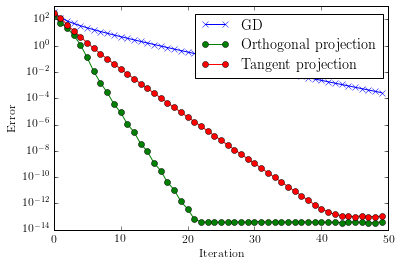

In [9]:
# Case 1: Projector-Splitting versus Gradient descent
#Random initialization
x_orig = np.random.randn(n, r0), np.random.randn(r0, r0), np.random.randn(n, r0)
x_start = np.random.randn(n, r0), np.random.randn(r0, r0), np.random.randn(n, r0)
x_start, x_orig = orthogonalize(x_start), orthogonalize(x_orig)
x_orig = diagonalize_core(x_orig)
print 'The singular values of fixed point matrix are \n', np.diag(x_orig[1])
f = full(x_orig)
f = A.dot(f.flatten()).reshape(f.shape)
grad_dist, orth_proj_norm, tangent_proj_norm = [], [], []
k = 50
# Gradient Descent Convergence
x = full(x_start)
for i in xrange(k):
    grad_dist.append(la.norm(x - full(x_orig)))
    dx = f - (A.dot(x.flatten())).reshape(x.shape)
    x = x + dx
# Projector Splitting Convergence
x = x_start
dx_orig = full(x)-full(x_orig)
for i in xrange(k):
    dx = grad(A, x, f)
    u1, v, dx_tangent = inter_point(x, dx_orig)
    dx_orig = full(x)-full(x_orig)
    dx_orig_tangent = u1.dot(u1.T.dot(dx_orig)) + (dx_orig.dot(v)).dot(v.T) - u1.dot(u1.T.dot(dx_orig).dot(v)).dot(v.T)
    orth_proj_norm.append(la.norm(dx_orig - dx_orig_tangent))
    tangent_proj_norm.append(la.norm(dx_orig_tangent))
    x = projector_splitting_2d(x, dx)
# Plotting
plt.semilogy(grad_dist, marker='x', label="GD")
plt.semilogy(orth_proj_norm, marker='o', label="Orthogonal projection")
plt.semilogy(tangent_proj_norm, marker='o', label="Tangent projection")
plt.legend(bbox_to_anchor=(0.40, 1), loc=2)#(1.05, 1), loc=2
plt.xlabel('Iteration')
plt.ylabel('Error')

## Bad curvature 

Now let us design bad singular values for the solution,

$$\sigma_k = 10^{2-2k}.$$

The singular values of fixed point matrix are 
[100, 1, 0.01, 0.0001, 1e-06, 1e-08, 1e-10]


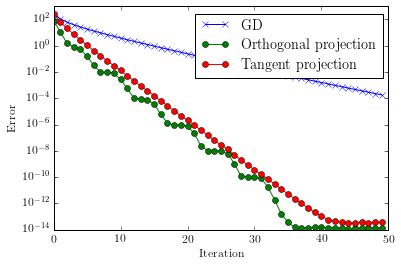

In [10]:
# Case 2: Stair convergence
x_orig = np.random.randn(n, r0), np.random.randn(r0, r0), np.random.randn(n, r0)
x_start = np.random.randn(n, r0), np.random.randn(r0, r0), np.random.randn(n, r0)
x_start, x_orig = orthogonalize(x_start), orthogonalize(x_orig)
x_orig = diagonalize_core(x_orig)
u, s, v = x_orig
s_diag = [10**(2-2*i) for i in xrange(r)]
x_orig = (u, np.diag(s_diag), v)
print 'The singular values of fixed point matrix are \n', s_diag
f = full(x_orig)
f = A.dot(f.flatten()).reshape(f.shape)
grad_dist, orth_proj_norm, tangent_proj_norm = [], [], []
k = 50
# Gradient Descent Convergence
x = full(x_start)
for i in xrange(k):
    grad_dist.append(la.norm(x - full(x_orig)))
    dx = f - (A.dot(x.flatten())).reshape(x.shape)
    x = x + dx
# Projector Splitting Convergence
x = x_start
for i in xrange(k):
    dx = grad(A, x, f)
    u1, v, dx_tangent = inter_point(x, dx_orig)
    dx_orig = full(x)-full(x_orig)
    dx_orig_tangent = u1.dot(u1.T.dot(dx_orig)) + (dx_orig.dot(v)).dot(v.T) - u1.dot(u1.T.dot(dx_orig).dot(v)).dot(v.T)
    orth_proj_norm.append(la.norm(dx_orig - dx_orig_tangent))
    tangent_proj_norm.append(la.norm(dx_orig_tangent))
    x = projector_splitting_2d(x, dx)
# Plotting
plt.semilogy(grad_dist, marker='x', label="GD")
plt.semilogy(orth_proj_norm, marker='o', label="Orthogonal projection")
plt.semilogy(tangent_proj_norm, marker='o', label="Tangent projection")
plt.legend(bbox_to_anchor=(0.40, 1), loc=2)#(1.05, 1), loc=2
plt.xlabel('Iteration')
plt.ylabel('Error')

## Consequences

The typical convergence: 

- Tangent component convergence linearly.
- Normal components decays quadratically until it hits **the next singular values**, and then waits for the tangent component to catch. 
- The convergence is **monotone:** First the first singular vector converge, then the second and so on.

Adversal examples are still possible (similar to the convergence of the power method).


## Case when Riemannian is worse
You can make up an example, when on the first iteration it is worse: it is basically the **angle** between $V_*$ and $V_0$.

The singular values of fixed point matrix are 
[100, 1, 0.01, 0.0001, 1e-06, 1e-08, 1e-10]


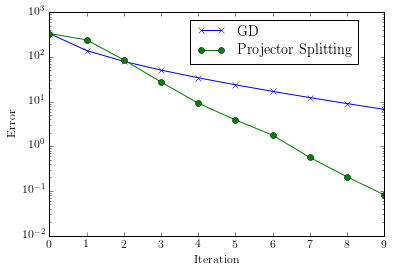

In [11]:
# Case 3: Stair convergence
x_orig = np.random.randn(n, r0), np.random.randn(r0, r0), np.random.randn(n, r0)
x_start = np.random.randn(n, r0), np.random.randn(r0, r0), np.random.randn(n, r0)
x_start, x_orig = orthogonalize(x_start), orthogonalize(x_orig)
eps = 1e-12
u, s, v = x_orig
u1, s1, v1 = x_start
u1 = u1 - u.dot(u.T.dot(u1)) 
v1 = v1 - v.dot(v.T.dot(v1))
x_start = u1, s1, v1
x_orig = diagonalize_core(x_orig)
print 'The singular values of fixed point matrix are \n', s_diag
f = full(x_orig)
f = A.dot(f.flatten()).reshape(f.shape)
grad_dist, proj_dist = [], []
k = 10
# Gradient Descent Convergence
x = full(x_start)
for i in xrange(k):
    grad_dist.append(la.norm(x - full(x_orig)))
    dx = f - (A.dot(x.flatten())).reshape(x.shape)
    x = x + dx
# Projector Splitting Convergence
x = x_start
for i in xrange(k):
    dx = grad(A, x, f)
    u1, v, dx_tangent = inter_point(x, dx_orig)
    dx_orig = full(x)-full(x_orig)    
    proj_dist.append(la.norm(dx_orig))
    x = projector_splitting_2d(x, dx)
# Plotting
plt.semilogy(grad_dist, marker='x', label="GD")
plt.semilogy(proj_dist, marker='o', label="Projector Splitting")
plt.legend(bbox_to_anchor=(0.40, 1), loc=2)#(1.05, 1), loc=2
plt.xlabel('Iteration')
plt.ylabel('Error')

## Theory status

We are still working on the theory.

Even the case $n = 2$, $r = 1$ is non-trivial, but yesterday (Tuesday 19th) the estimate was obtained.

Actually, I think it can be generalized to arbitrary $n, r$ by block matrix argument.

## Conclusions
- For the algorithms: this "gradual convergence" may give a hint on how to adapt the ranks during the iteration.
- For applications, they are many (and we are working on machine learning applications, stay tuned).
- The TT-case is in progress as well.

## Papers and software
**Software**
- TT-Toolbox: https://github.com/oseledets/ttpy (Python)
- https://github.com/oseledets/TT-Toolbox (MATLAB)
**Papers**
- Christian Lubich and Ivan V. Oseledets. A projector-splitting integrator for dynamical low-rank approximation. BIT, 54(1):171–188, 2014
- [Christian Lubich, Ivan Oseledets, and Bart Vandereycken. Time integration of tensor trains. arXiv preprint 1407.2042, 2014.](http://arxiv.org/abs/1407.2042), published in SINUM
- [Jutho Haegeman, Christian Lubich, Ivan Oseledets, Bart Vandereycken, and Frank Verstraete. Unifying time evolution and optimization with matrix product states. arXiv preprint 1408.5056, 2014.](http://arxiv.org/abs/1408.5056)

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("custom.css", "r").read()
    return HTML(styles)
css_styling()